# Quantum Oracle Demo

## Build and Compile the Circuit

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(4, 'q')
tmp = QuantumRegister(1, 'tmp')
res = ClassicalRegister(4, 'res')

In [2]:
# Build oracle. The secret number is represented by integer s.
s = 0b1001
oracle = QuantumCircuit(q, tmp, res)
for i in range(len(q)):
    if (s & (1 << i)):
        oracle.cx(q[i], tmp[0])

In [3]:
# Embed oracle in the larger BV circuit
bv = QuantumCircuit(q, tmp, res)
bv.x(tmp[0])
bv.barrier()
bv.h(q)
bv.h(tmp)
bv.barrier()
bv += oracle
bv.barrier()
bv.h(q)
bv.h(tmp)
bv.barrier()
bv.measure(q, res);

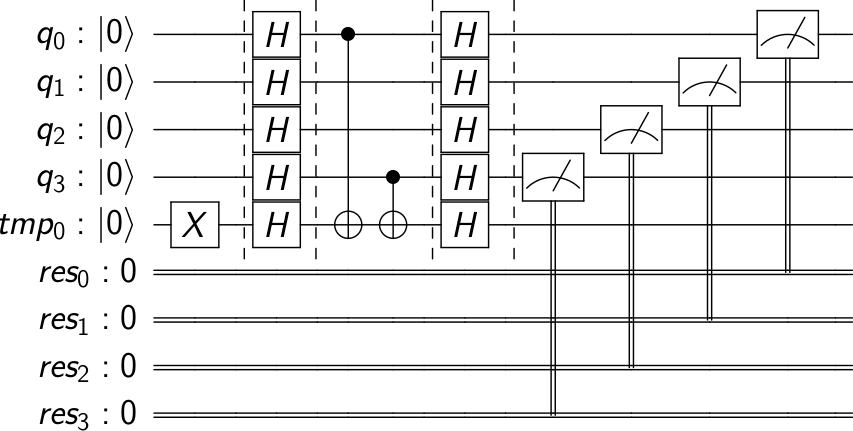

In [4]:
bv.draw(output='latex', scale=0.7)

## Execute on a Simulator

In [5]:
# Access local simulators from Qiskit Aer
from qiskit import Aer, execute
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [6]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(bv, simulator).result()

In [7]:
from qiskit.tools.visualization import plot_histogram
sim_counts = sim_result.get_counts()
sim_counts

{'1001': 1024}

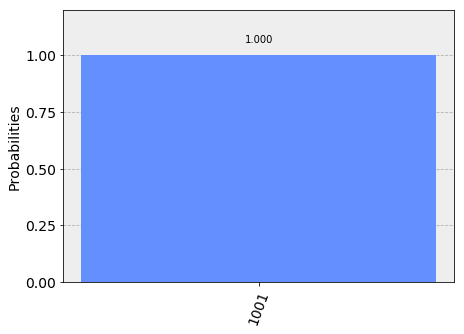

In [8]:
plot_histogram(sim_counts)

The Bernstein-Vazirani circuit finds the secret bitstring 100% of the time, with just 1 Oracle query.

## Execute on a Quantum Computer

In [9]:
# authenticate to use IBMQ remote backends 
from qiskit import IBMQ
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [10]:
# import jupyter magic tools to ease tracking of submitted job's progress
from qiskit.tools.jupyter import *

In [11]:
%qiskit_backend_overview

In [12]:
# let's choose a 5-qubit device and execute
device = IBMQ.get_backend('ibmqx4')

In [13]:
%%qiskit_job_status

# qiskit jobs are submitted asynchronously. You can monitor a submitted job's status
job = execute(bv, device, shots=1024)

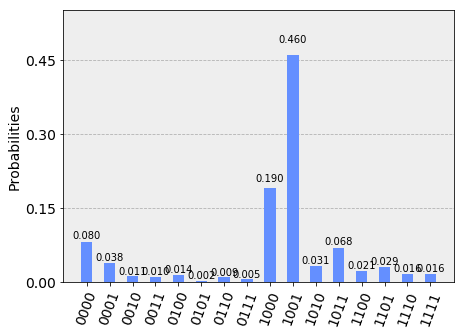

In [14]:
# NOTICE! Executing this cell will block until result is available
device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram(device_counts)

Real devices are noisy. We repeat the experiment for 1000 shots to find the correct answer among the noise.

In [14]:
%%qiskit_job_status

bigger_device = IBMQ.get_backend('ibmq_16_melbourne')
job = execute(bv, bigger_device, shots=1024)

In [ ]:
bigger_device_result = job.result()
bigger_device_counts = bigger_device_result.get_counts()
plot_histogram(bigger_device_counts)